<a href="https://colab.research.google.com/github/saddarudin/google_colab/blob/main/ml_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

In [2]:
dataset = load_digits()
dir(dataset)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [3]:
dataset.data.shape

(1797, 64)

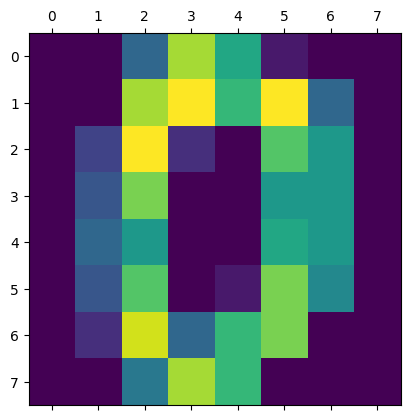

In [6]:
plt.matshow(dataset.data[0].reshape(8,8))
plt.show()

In [7]:
df = pd.DataFrame(dataset.data,columns=dataset.feature_names)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [8]:
df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [9]:
x = df
y = dataset.target
y

array([0, 1, 2, ..., 8, 9, 8])

In [11]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=30)
x_train.shape,x_test.shape

((1437, 64), (360, 64))

In [15]:
model = LogisticRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9722222222222222

In [17]:
pca = PCA(0.95)
x_pca=pca.fit_transform(x)
x_pca.shape

(1797, 29)

In [18]:
x_train_pca,x_test_pca,y_train_pca,y_test_pca = train_test_split(x_pca,y,test_size=0.2,random_state=30)
x_train_pca.shape,x_test_pca.shape

((1437, 29), (360, 29))

In [19]:
model = LogisticRegression(max_iter=10000)
model.fit(x_train_pca,y_train_pca)
model.score(x_test_pca,y_test_pca)

0.9694444444444444

## Exercise

In [20]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [24]:
df.Sex.value_counts()

,count
Sex,
M,725
F,193


In [25]:
df.Sex.replace({'F':0,'M':1},inplace=True)
df.head()

<ipython-input-25-3d5b4e274a4b>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.Sex.replace({'F':0,'M':1},inplace=True)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [26]:
df.ChestPainType.value_counts()

,count
ChestPainType,
ASY,496
NAP,203
ATA,173
TA,46


In [28]:
dummies = pd.get_dummies(df.ChestPainType,drop_first=True,dtype=int)
dummies.head()

,ATA,NAP,TA
0,1,0,0
1,0,1,0
2,1,0,0
3,0,0,0
4,0,1,0


In [29]:
df = pd.concat([df,dummies],axis='columns')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ATA,NAP,TA
0,40,1,ATA,140,289,0,Normal,172,N,0.0,Up,0,1,0,0
1,49,0,NAP,160,180,0,Normal,156,N,1.0,Flat,1,0,1,0
2,37,1,ATA,130,283,0,ST,98,N,0.0,Up,0,1,0,0
3,48,0,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0,0,0
4,54,1,NAP,150,195,0,Normal,122,N,0.0,Up,0,0,1,0


In [30]:
df = df.drop('ChestPainType',axis='columns')
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ATA,NAP,TA
0,40,1,140,289,0,Normal,172,N,0.0,Up,0,1,0,0
1,49,0,160,180,0,Normal,156,N,1.0,Flat,1,0,1,0
2,37,1,130,283,0,ST,98,N,0.0,Up,0,1,0,0
3,48,0,138,214,0,Normal,108,Y,1.5,Flat,1,0,0,0
4,54,1,150,195,0,Normal,122,N,0.0,Up,0,0,1,0


In [32]:
df.RestingECG.value_counts()

,count
RestingECG,
Normal,552
LVH,188
ST,178


In [33]:
dummies = pd.get_dummies(df.RestingECG,drop_first=True,dtype=int)
df = pd.concat([df,dummies],axis='columns')
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ATA,NAP,TA,Normal,ST
0,40,1,140,289,0,Normal,172,N,0.0,Up,0,1,0,0,1,0
1,49,0,160,180,0,Normal,156,N,1.0,Flat,1,0,1,0,1,0
2,37,1,130,283,0,ST,98,N,0.0,Up,0,1,0,0,0,1
3,48,0,138,214,0,Normal,108,Y,1.5,Flat,1,0,0,0,1,0
4,54,1,150,195,0,Normal,122,N,0.0,Up,0,0,1,0,1,0


In [34]:
df = df.drop('RestingECG',axis='columns')
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ATA,NAP,TA,Normal,ST
0,40,1,140,289,0,172,N,0.0,Up,0,1,0,0,1,0
1,49,0,160,180,0,156,N,1.0,Flat,1,0,1,0,1,0
2,37,1,130,283,0,98,N,0.0,Up,0,1,0,0,0,1
3,48,0,138,214,0,108,Y,1.5,Flat,1,0,0,0,1,0
4,54,1,150,195,0,122,N,0.0,Up,0,0,1,0,1,0


In [35]:
df.ExerciseAngina.value_counts()

,count
ExerciseAngina,
N,547
Y,371


In [36]:
df.ExerciseAngina = df.ExerciseAngina.apply(lambda x: 1 if x=='Y' else 0)
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ATA,NAP,TA,Normal,ST
0,40,1,140,289,0,172,0,0.0,Up,0,1,0,0,1,0
1,49,0,160,180,0,156,0,1.0,Flat,1,0,1,0,1,0
2,37,1,130,283,0,98,0,0.0,Up,0,1,0,0,0,1
3,48,0,138,214,0,108,1,1.5,Flat,1,0,0,0,1,0
4,54,1,150,195,0,122,0,0.0,Up,0,0,1,0,1,0


In [37]:
df.ST_Slope.value_counts()

,count
ST_Slope,
Flat,460
Up,395
Down,63


In [38]:
dummies = pd.get_dummies(df.ST_Slope,drop_first=True,dtype=int)
df = pd.concat([df,dummies],axis='columns')
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ATA,NAP,TA,Normal,ST,Flat,Up
0,40,1,140,289,0,172,0,0.0,Up,0,1,0,0,1,0,0,1
1,49,0,160,180,0,156,0,1.0,Flat,1,0,1,0,1,0,1,0
2,37,1,130,283,0,98,0,0.0,Up,0,1,0,0,0,1,0,1
3,48,0,138,214,0,108,1,1.5,Flat,1,0,0,0,1,0,1,0
4,54,1,150,195,0,122,0,0.0,Up,0,0,1,0,1,0,0,1


In [39]:
df = df.drop('ST_Slope',axis='columns')
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ATA,NAP,TA,Normal,ST,Flat,Up
0,40,1,140,289,0,172,0,0.0,0,1,0,0,1,0,0,1
1,49,0,160,180,0,156,0,1.0,1,0,1,0,1,0,1,0
2,37,1,130,283,0,98,0,0.0,0,1,0,0,0,1,0,1
3,48,0,138,214,0,108,1,1.5,1,0,0,0,1,0,1,0
4,54,1,150,195,0,122,0,0.0,0,0,1,0,1,0,0,1


In [40]:
x = df.drop('HeartDisease',axis='columns')
y = df.HeartDisease
x.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ATA,NAP,TA,Normal,ST,Flat,Up
0,40,1,140,289,0,172,0,0.0,1,0,0,1,0,0,1
1,49,0,160,180,0,156,0,1.0,0,1,0,1,0,1,0
2,37,1,130,283,0,98,0,0.0,1,0,0,0,1,0,1
3,48,0,138,214,0,108,1,1.5,0,0,0,1,0,1,0
4,54,1,150,195,0,122,0,0.0,0,1,0,1,0,0,1


In [42]:
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-1.4331398 ,  0.51595242,  0.41090889, ..., -0.49044933,
        -1.00218103,  1.15067399],
       [-0.47848359, -1.93816322,  1.49175234, ..., -0.49044933,
         0.99782372, -0.86905588],
       [-1.75135854,  0.51595242, -0.12951283, ...,  2.03894663,
        -1.00218103,  1.15067399],
       ...,
       [ 0.37009972,  0.51595242, -0.12951283, ..., -0.49044933,
         0.99782372, -0.86905588],
       [ 0.37009972, -1.93816322, -0.12951283, ..., -0.49044933,
         0.99782372, -0.86905588],
       [-1.64528563,  0.51595242,  0.30282455, ..., -0.49044933,
        -1.00218103,  1.15067399]])

In [44]:
x_scaled.shape

(918, 15)

In [43]:
pca = PCA(0.95)
x_pca = pca.fit_transform(x_scaled)
x_pca.shape

(918, 13)

In [45]:
x_train,x_test,y_train,y_test = train_test_split(x_pca,y,test_size=0.2,random_state=30)
x_train.shape,x_test.shape

((734, 13), (184, 13))

In [46]:
model = LogisticRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8369565217391305